# Simulacion Digital parcial 2 grupo 5

# **1. Sistema de colas con un solo servidor con dos colas** <a name="eje1"></a>

1. Construir un programa que simule un sistema de colas con un solo servidor con dos colas, una de
ellas con prioridad. Entregar el código fuente con los comentarios necesarios para explicar el
proceso. El programa debe al menos entregar datos de espera promedio para los usuarios de cada
cola.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt                                                                                
import random 

# Seed 
random.seed(19)

# No. de Clientes
size = 20
l = 1 # Promedio de llegadas por minuto
µ = 0.8 # Promedio de personas atendidas por minuto

Cliente = [i for i in range(1,size+1)]

# Tiempo entre llegadas
T_entre_Llegadas = list(np.random.exponential(scale=1/l,size=size))

# Tiempo de Servicio
T_de_Servicio = list(np.random.exponential(scale=1/µ,size=size))

# Calcular tiempo de llegada
T_llegada = [0 for i in range(size)]

# Inicial
T_llegada[0] = round(T_entre_Llegadas[0],2)

for i in range(1,size):
  T_llegada[i] = round((T_entre_Llegadas[i]+T_llegada[i-1]),2)
 

Inicio_T_servicio = [0 for i in range(size)]
Final_T_Servicio = [0 for i in range(size)]
T_Cliente_en_Sistema = [0 for i in range(size)]
Sistema_libre = [0 for i in range(size)]

Inicio_T_servicio[0] = round((T_llegada[0]),2)
Final_T_Servicio[0] = round((T_de_Servicio[0]),2)
T_Cliente_en_Sistema[0] = round(T_de_Servicio[0],2)

T_Espera_en_Cola = [0 for i in range(size)]
T_Espera_en_Cola2 = [0 for i in range(size)]

Numero_Cola= [0 for i in range(size)]
list_2= [0 for i in range(size)]

# Se asigna una cola aleatoriamente a cada cliente 
for i in range(size):
  Numero_Cola[i]=  random.randint(1, 2)

# Calculo orden de atencion
# La cola 1 tendra prioridad sobre la cola 2, ya que seran atendidas 2 personas de la cola 1 y luego 1 persona de la cola 2 asi sucesivamente
c=2
list_1=[]
for i in range(size):
 for i in range(size):
  if(Numero_Cola[i]==2 and c==0 and list_2[i]==0):
    list_1.append(i+1)
    c=0
    list_2[i]=1
    for j in range(size):
     if(list_2[j]==0 and Numero_Cola[j]==1 ): 
       c=2
    break
  if(Numero_Cola[i]==1 and c>0 and list_2[i]==0):
    list_1.append(i+1)
    c=c-1
    k=c
    list_2[i]=1
    c=0
    for j in range(size):
     if(list_2[j]==0 and Numero_Cola[j]==1): 
       c=k
    break


c=1

# Procesamiento de la simulación 
for i in range(1,size):

  # Inincio Tiempo de Servicio  
  Inicio_T_servicio[list_1[i]-1] = round(max(T_llegada[list_1[i]-1],Final_T_Servicio[list_1[i-1]-1]),2)
     

  # Tiempo en que Servicio Termina
  Final_T_Servicio[list_1[i]-1] = round(Inicio_T_servicio[list_1[i]-1] + T_de_Servicio[list_1[i]-1],2)  


  # Tiempo de Espera en las Colas
  if(Numero_Cola[list_1[i]-1]==2):
   T_Espera_en_Cola2[list_1[i]-1] = round(Inicio_T_servicio[list_1[i]-1]-T_llegada[list_1[i]-1],2)
  else:
    T_Espera_en_Cola[list_1[i]-1] = round(Inicio_T_servicio[list_1[i]-1]-T_llegada[list_1[i]-1],2)


  # Tiempo que el Cliente Gasto en el Sistema
  T_Cliente_en_Sistema[list_1[i]-1] = round(Final_T_Servicio[list_1[i]-1] - T_llegada[list_1[i]-1],2)


  # Tiempo sistema permanece libre
  if (T_llegada[list_1[i]-1]>Final_T_Servicio[list_1[i-1]-1]):
    Sistema_libre[list_1[i]-1] = round(T_llegada[list_1[i]-1]-Final_T_Servicio[list_1[i-1]-1],2)
  else:
    Sistema_libre[list_1[i]-1] = 0 
    
#Tabla

from prettytable import PrettyTable

x = PrettyTable()

T_entre_Llegadas_G=[0 for i in range(size)]
T_de_Servicio_G=[0 for i in range(size)]

for i in range(0,size):
  T_entre_Llegadas_G[i] = round(T_entre_Llegadas[i],2)
  T_de_Servicio_G[i]= round(T_de_Servicio[i],2)

column_names = ['N°_Cliente','N°_Cola','Orden_de_Atencion','TiempoEL','TiempoL','TiempoS','InicioTS','TiempoEEC1','TiempoEEC2','FinalTS','TiempoCES','Sistema_libre']
data = [Cliente, Numero_Cola, list_1, T_entre_Llegadas_G,T_llegada,T_de_Servicio_G,  Inicio_T_servicio, T_Espera_en_Cola, T_Espera_en_Cola2, Final_T_Servicio, T_Cliente_en_Sistema,Sistema_libre]

length = len(column_names)

for i in range(length):
  x.add_column(column_names[i],data[i])
  
print(x)

'''
Medida de rendimiento

Tiempo medio de espera  = Tiempo Total de Espera en la Cola / Numero Total de Clientes
 
Probabilidad de que el cliente estuviera esperando = Numero de Clientes que Esperan / Total Numero de Clientes
 
Probabilidad de servidor inactivo =  Total Tiempo Servidor Inactivo /  Tiempo total de la Ejecucion del Sistema
 
Tiempo medio entre llegada = Sum Entre todos los Tiempos entre Llegadas / Numero de Llegadas - 1 
 
Tiempo medio de espera de los que esperan = Tiempo Total de Espera en la Cola / Total no. de Clientes que Esperan
 
Tiempo promedio de permanencia del cliente en el sistema  = Tiempo Total que los Clientes Esperaron en el Sistema / Total no. de Clientes 
'''

# Tiempo medio de espera 1
N_Clientes_que_Esperan = len(list(filter(lambda x:x==1,Numero_Cola)))
T_medio_de_Espera = sum(T_Espera_en_Cola)/N_Clientes_que_Esperan 

# Tiempo medio de espera 2
N_Clientes_que_Esperan = len(list(filter(lambda x:x==2,Numero_Cola)))
T_medio_de_Espera2 = sum(T_Espera_en_Cola2)/N_Clientes_que_Esperan


# Tiempo medio de servicio
T_medio_de_Servicio = sum(T_de_Servicio)/size

# Probabilidad de servidor inactivo
Prob_Servidor_Inactivo = sum(Sistema_libre) / Final_T_Servicio[size-1]  

# Tiempo medio entre llegada
T_Medio_Entre_Llegadas = T_llegada[size-1] / (len(T_llegada) - 1)


print("Tiempo medio de espera en Cola 1 : {:.2f}".format(T_medio_de_Espera))
print('-'*50)

print("Tiempo medio de espera en Cola 2 : {:.2f}".format(T_medio_de_Espera2))
print('-'*50)

print("Tiempo medio de servicio : {:.2f}".format(T_medio_de_Servicio))
print('-'*50)

print("Probabilidad de servidor inactivo : {:.2f}".format(Prob_Servidor_Inactivo))
print('-'*50)

print("Tiempo medio entre llegada : {:.2f}".format(T_Medio_Entre_Llegadas))
print('-'*50)

+------------+---------+-------------------+----------+---------+---------+----------+------------+------------+---------+-----------+---------------+
| N°_Cliente | N°_Cola | Orden_de_Atencion | TiempoEL | TiempoL | TiempoS | InicioTS | TiempoEEC1 | TiempoEEC2 | FinalTS | TiempoCES | Sistema_libre |
+------------+---------+-------------------+----------+---------+---------+----------+------------+------------+---------+-----------+---------------+
|     1      |    1    |         1         |   1.18   |   1.18  |   1.08  |   1.18   |     0      |     0      |   1.08  |    1.08   |       0       |
|     2      |    1    |         2         |   1.85   |   3.03  |   0.24  |   3.03   |    0.0     |     0      |   3.27  |    0.24   |      1.95     |
|     3      |    1    |         4         |   0.68   |   3.71  |   4.16  |   5.0    |    1.29    |     0      |   9.16  |    5.45   |       0       |
|     4      |    2    |         3         |   1.26   |   4.97  |   0.03  |   4.97   |     0  

#**2. Sistema de inventarios** <a name="eje2"></a>


2. Realizar los incisos a y b del ejercicio 16.5-8 del Libro de Hillier y Lieberman. Después de esto,
construya un programa que simule ese sistema de inventarios usando el enfoque de eventos
discretos. Idee una manera de calcular el costo promedio de inventario y de incumplimiento a largo
plazo.

In [ ]:
from random import randint
import pandas as pd

Periodo = 1095

Num_P = range(1,Periodo)  #Número de periodos

Uni_fal = [0]  #Número faltante de unidades antes de la orden
can_inv = 4    #cantidad en el inventario
can_inv_f = [2]  #inventario restante
mitad_inv  = 0    #la mitad del pedido
Demanda = []  #Demanda
Pedidos = []  #Pedidos
 
for i in Num_P:    # i nos da el periodo en el cuál estamos
  Dem  = randint(0,4)     #generamos las demandas respectivas para este periodo  0,1,2,3
  Demanda.append(Dem)             #agregamos a una lista las demandas
  Uni_fal.append(can_inv - Dem)         # calculamos las unidades faltantes
  if Uni_fal[i] < 1:             
    while Uni_fal[i] + 2*mitad_inv < 1:  # calculamos el menor valor de mitad del inv el cual  Unidades faltantes + 2mitad del inventario >= 1     
      mitad_inv += 1                

  if can_inv_f[i-1] - Dem < 1:       
    can_inv_f.append(can_inv_f[i-1]- Dem + 2*mitad_inv)  
  else:
    can_inv_f.append(can_inv_f[i-1]- Dem)       
                                  

  can_inv = can_inv_f[i]      #Asignamos el ciclo que sera el actual ya que se realizo la orden
  Pedidos.append(2*mitad_inv) #guardamos el pedido realizado
  mitad_inv = 0           #reseteamos el pedido

In [ ]:
from google.colab import data_table

data_table.enable_dataframe_formatter()

data = list(zip(can_inv_f, Uni_fal, Demanda, Pedidos))
data = pd.DataFrame(data, columns=['Inventario restante', 'Unidades faltantes', 'Demanda', 'No.pedidos'])
data

Inventario restante  Unidades faltantes  Demanda  No.pedidos
0                       2                   0        0           0
1                       2                   4        4           4
2                       2                  -2        3           2
3                       1                  -1        3           4
4                       2                  -2        0           0
...                   ...                 ...      ...         ...
1089                    1                  -1        3           4
1090                    2                  -2        2           2
1091                    2                   0        1           0
1092                    1                   1        2           2
1093                    1                  -1        3           4

[1094 rows x 4 columns]

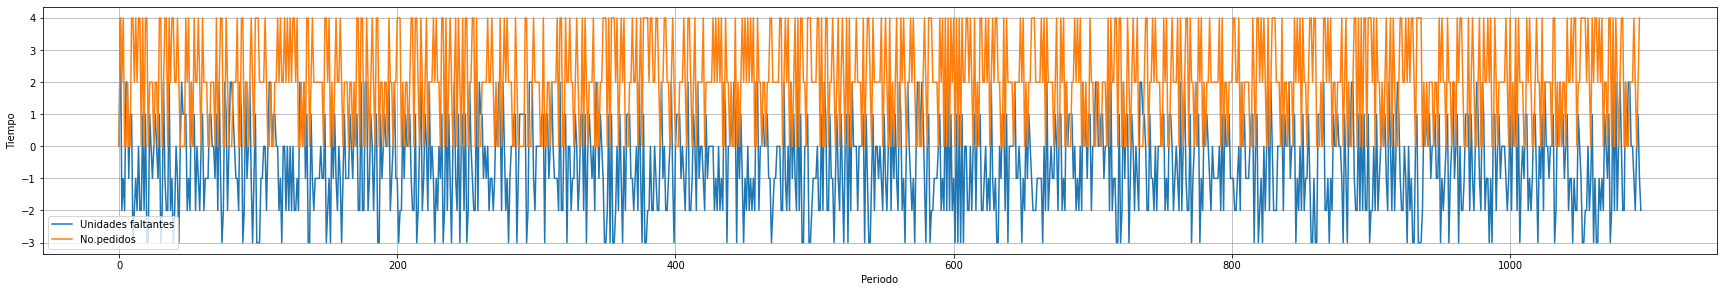

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.subplot(212)
plt.plot(Uni_fal, label='Unidades faltantes')
plt.plot(Pedidos, label='No.pedidos')

plt.xlabel('Periodo')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
#la diferencia es poca es bastante estable 
from collections import Counter
Coun = Counter(can_inv_f).values()
Coun = list(Coun)
print(Coun[0]/Periodo, Coun[1]/Periodo)

0.502283105022831 0.4977168949771689


<h1>Costos definidos en el ejercicio del libro



Costo de inventario sera igual a Zn si este es mayor o igual que 0

Costo de incumplimiento sera igual a -4*Zn si este es < 0


In [ ]:
positives = [x for x in Uni_fal if x >= 0]
print("Costo promedio de Inventario ",np.mean(positives))
negatives = [abs(x) for x in Uni_fal if x < 0]
print("Costo promedio de Incumplimiento ", np.mean(negatives))

Costo promedio de Inventario  0.7657142857142857
Costo promedio de Incumplimiento  1.7912280701754386


# **3. Proceso con eventos discretos,**

Dado un programa que simule un proceso con eventos discretos

1.   ¿Qué mecanismos podría utilizar para validar los promedios obtenidos de las variables de interés? Explicar de manera general el proceso. 

2.   ¿Que mecanismos podría usar para validar que un conjunto de datos aleatorios continuos se comporta como un distribución dada? Explicar también de manera general este proceso.

1- Los mecanismos que se pueden utilizar en el proceso de la validacion de los promedios de las variables de interes son varios, entre ellos el bootstrapping, metodo que consiste en el remuestreo de una poblacion para aproximar la distribucion en el muestreo de un estadistico, a menudo se emplea en la aproximacion del sesgo o varianza de un analisis y en la construccion de intervalos de confianza.

De forma general este proceso permite modelar la inferencia sobre una poblacion mediante un nuevo remuestreo de los datos que hacen parte de la muestra, y realizar un calculo de inferencia sobre la nueva muestra, lo cual al construir los intervalos de confianza permite comprobar si los promedios obtenidos de las variables de interes concuerdan con lo esperado.

2- Existen diversos mecanismos que se pueden utilizar para validar que un conjunto de datos aleatorios continuos siguen el comportamiento de una distribucion dada, principalmente 2, la prueba de chi cuadrado, y la prueba de Kolmogorov-Smirnov, siendo la primera una aplicacion de la distribucion de la suma del cuadrado de K variables aleatorias independientes con una distribucion normal estandar, la cual es utilizada en las pruebas de hipotesis y en la construccion de intervalos de confianza, pero la prueba de chi cuadrado es utilizada como prueba de independencia y como prueba de bondad de ajuste y en la estimacion de varianzas, en cambio la prueba K-S (Kolmogorov-Smirnov) es una prueba no parametrica que determina la bondad de ajuste de dos distribuciones de probabilidad entre si.

De forma general el proceso de validacion del comportamiento del conjunto de datos se realiza al aplicar los metodos mencionados anteriormente en el calculo de bondad de ajuste, lo cual compara el comportamiento de los datos con la distribucion definida y arroja como resultado si la hipotesis sobre si los datos cumplen una cierta distribucion se puede rechazar, o se debe rechazar la hipotesis alternativa.


# **4. Muestras de una distribución que consista en la multiplicación de dos exponenciales con una tasa λ**

4. Modificar un ejemplo de implementación del muestreo de Gibbs (por ejemplo el que se encuentra
en https://mr-easy.github.io/2020-05-21-implementing-gibbs-sampling-in-python/) para que genere
muestras de una distribución que consista en la multiplicación de dos exponenciales con una tasa λ
(pueden poner un valor específico). ¿Qué otra forma existe para generar muestras de una
distribución así?

In [ ]:
import numpy as np
from math import log
from random import random
import matplotlib.pyplot as plt

In [ ]:
def twoexp_product():                
  lambdaa = 3                           
  product = -lambdaa*log(random())*-lambdaa*log(random())
  return product

N = 15000
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = 1.
y[0] = 6.

for i in range(1, N, 2):
    x[i] = twoexp_product()
    y[i] = y[i-1]
    y[i+1] = twoexp_product()
    x[i+1] = x[i]

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(x[::10],y[::10], '.', alpha=0.1)
plt.plot(x[:1000],y[:1000], c='g', alpha=0.3, lw=1)

plt.subplot(1,2,2)
plt.plot(x,y, '.', alpha=0.1)
plt.plot(x,y, c='g', alpha=0.3, lw=1)

#Implementación del muestreo de Gibbs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def plot_gaussian_from_points(x, y, ax, n_std=3.0, facecolor='none', **kwargs):

    if len(x) != len(y):
        raise ValueError("x and y must be the same size")
    if len(x) < 2:
        raise ValueError("Need more data.")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def plot_gaussian_from_parameters(mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):

    if len(mean) != 2:
        raise ValueError("Mean vector length should be 2.")
    if (cov.shape != (2, 2)):
    	raise ValueError("Covariance should be a 2x2 matrix.")
    #checking if cov is symmetric pos semidefinite
    if(cov[0, 1] != cov[1, 0]):
      raise ValueError("Covariance should be symmetric.")
    if(cov[0, 0] < 0 or cov[0, 0]*cov[1,1] - cov[0,1]**2 < 0):
      raise ValueError("Covariance should be positive semidefinite.")

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


   

In [ ]:
!pip install gif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gif: filename=gif-3.0.0-py3-none-any.whl size=4818 sha256=d541d731b0498b12d52b09244a173ba26012e9166711aeb6fddb37b4da627c71
  Stored in directory: /root/.cache/pip/wheels/21/63/09/b1e3c512d244da0a7c1d9565f09592612d04b79ccbb95146ae
Successfully built gif


Ellipse(xy=(0, 0), width=1.9552663672234638, height=2.0437547390048443, angle=0)


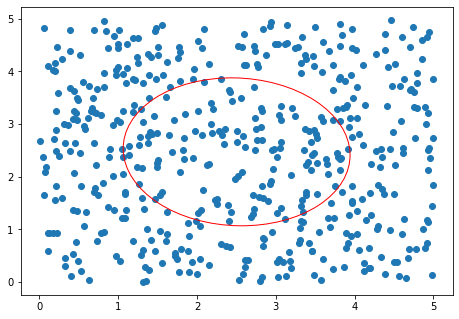

In [ ]:
from random import random
x = np.array([random()*5 for i in range(500)])
y = np.array([random()*5 for i in range(500)])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x, y)
print(plot_gaussian_from_points(x, y, ax, n_std=1, edgecolor='red'))
#print(plot_gaussian_from_parameters(np.array([2.5, 2.5]), np.cov(x, y), ax, n_std=1, edgecolor='red'))
plt.show() 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gif
from IPython.display import Image
from random import random

In [ ]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index = 1 - sampling_index
    a = cov[sampling_index, sampling_index]
    b = cov[sampling_index, conditioned_index]
    c = cov[conditioned_index, conditioned_index]
    
    mu = mean[sampling_index] + (b * (current_x[conditioned_index] - mean[conditioned_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    return new_x

In [ ]:
@gif.frame
def plot_samples(samples, num_samples, tmp_points, num_tmp, title="Gibbs Sampling", xlims=(-11, 11), ylims=(-11, 11)):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    
    # Plot the true distribution
    plot_gaussian_from_parameters(mean, cov, ax, n_std=2, edgecolor='g', alpha=0.5, label="True Distribution")
    
    # Plot sampled points
    ax.scatter(samples[:num_samples, 0], samples[:num_samples, 1], c='b', s=10, label="Sampled Points")
    ax.scatter(samples[0, 0], samples[0, 1], marker='*', c='g', s=60, label="Initial Point")
    
    # Plot samples from conditional distribution
    ax.scatter(tmp_points[:num_tmp, 0], tmp_points[:num_tmp, 1], c='r', alpha=0.4, s=5, label="Temporary Points")
    
    # Keeping the axes scales same for good GIFS
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    # Plot lines
    if(num_tmp > 0):
        ax.plot([samples[num_samples-1, 0], tmp_points[num_tmp-1, 0]], 
                [samples[num_samples-1, 1], tmp_points[num_tmp-1, 1]], c='k', alpha=0.25)
        # Plot estimated Gaussian, ignoring the starting point
        if(num_samples > 2):
            plot_gaussian_from_points(samples[1:num_samples, 0], samples[1:num_samples, 1], 
                                      ax, n_std=2, edgecolor='b', alpha=0.5, label="Estimated Distribution")
    
    ax.legend(loc='upper left')
    ax.set_title(title)

In [ ]:
def gibbs_sampler(initial_point, num_samples, mean, cov, create_gif=True):

    frames = []  # for GIF
    point = np.array(initial_point)
    samples = np.empty([num_samples+1, 2])  #sampled points
    samples[0] = point
    tmp_points = np.empty([num_samples, 2]) #inbetween points

    for i in range(num_samples):

        # Sample from p(x_0|x_1)
        point = conditional_sampler(0, point, mean, cov)
        tmp_points[i] = point
        if(create_gif):
            frames.append(plot_samples(samples, i+1, tmp_points, i+1, title="Num Samples: " + str(i)))
            
        # Sample from p(x_1|x_0)
        point = conditional_sampler(1, point, mean, cov)
        samples[i+1] = point
        if(create_gif):
            frames.append(plot_samples(samples, i+2, tmp_points, i+1, title="Num Samples: " + str(i+1)))
            
    if(create_gif):
        return samples, tmp_points, frames
    else:
        return samples, tmp_points

In [ ]:
mean = np.array([0, 0])
cov = np.array([[10, 3], 
                [3, 5]])

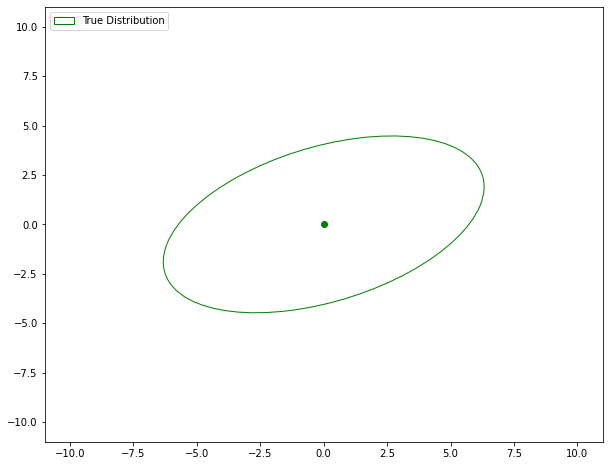

In [ ]:
# Plot true distribution
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()
plot_gaussian_from_parameters(mean, cov, ax, n_std=2, edgecolor='g', label="True Distribution")
ax.scatter(mean[0], mean[1], c='g')
ax.set_xlim((-11, 11))
ax.set_ylim((-11, 11))
ax.legend(loc='upper left')
plt.show()

In [ ]:
initial_point = [-9.0, -9.0]
num_samples = 500
samples, tmp_points, frames = gibbs_sampler(initial_point, num_samples, mean, cov, create_gif=True)

In [ ]:
# Creating the GIF
gif.save(frames, "gibbs.gif", duration=150)
Image(filename="gibbs.gif")

In [ ]:
!wget /content/gibbs.gif
Image(open('/content/gibbs.gif','rb').read())

El gif del ejemplo esta en los archivos de colab